In [1]:
# Krigging

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
x = [0,1,2,0,0,2]
y = [0,0,0,1,2,2]
v = [1,2,4,5,6,27]

dfp = pd.DataFrame({"x":x,"y":y,"v":v})

cp = CloudPoints().from_df(dfp, x='x',y='y',fields=['v'])
cp.df()

,x,y,z,crs,v,geometry
0,0.0,0.0,None,None,1.0,POINT (0.00000 0.00000)
0,1.0,0.0,None,None,2.0,POINT (1.00000 0.00000)
0,2.0,0.0,None,None,4.0,POINT (2.00000 0.00000)
0,0.0,1.0,None,None,5.0,POINT (0.00000 1.00000)
0,0.0,2.0,None,None,6.0,POINT (0.00000 2.00000)
0,2.0,2.0,None,None,27.0,POINT (2.00000 2.00000)


<AxesSubplot:xlabel='x', ylabel='y'>

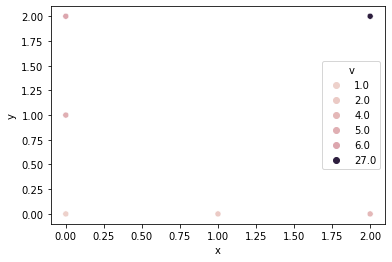

In [4]:
cp.plot(hue='v')

In [5]:
xu = [1,2,1,2,4,-1,8]
yu = [1,1,2,2,4,-1,8]
dfu = pd.DataFrame({"x":xu,"y":yu})
cpu = CloudPoints().from_df(dfu, x='x',y='y')
cpu.df()

,x,y,z,crs,geometry
0,1.0,1.0,None,None,POINT (1.00000 1.00000)
0,2.0,1.0,None,None,POINT (2.00000 1.00000)
0,1.0,2.0,None,None,POINT (1.00000 2.00000)
0,2.0,2.0,None,None,POINT (2.00000 2.00000)
0,4.0,4.0,None,None,POINT (4.00000 4.00000)
0,-1.0,-1.0,None,None,POINT (-1.00000 -1.00000)
0,8.0,8.0,None,None,POINT (8.00000 8.00000)


<AxesSubplot:>

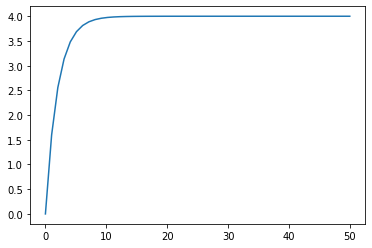

In [6]:
s = Exponential(
    sill = 4.,
    range = 2,
    nugget = 0.
)

s.plot(np.linspace(0,50,50))

<AxesSubplot:xlabel='x', ylabel='y'>

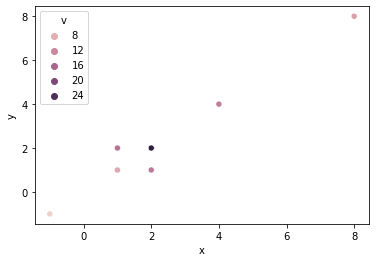

In [7]:
wm = s.ordinary_kriging(cp,cpu,v='v')

wm.plot(hue='v')

<AxesSubplot:xlabel='x', ylabel='y'>

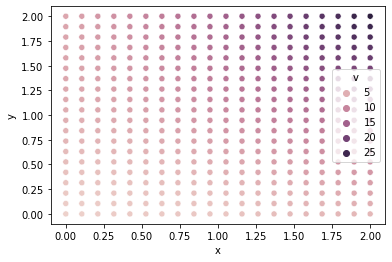

In [8]:
xn = np.linspace(0,2,20)
yn = np.linspace(0,2,20)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')
wm = s.ordinary_kriging(cp,cp2,v='v')

wm.plot(hue='v')

/var/folders/j7/nzf005ss2p30clvcx2r21ppm0000gn/T/ipykernel_49576/2412108842.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,vn)


<AxesSubplot:xlabel='x', ylabel='y'>

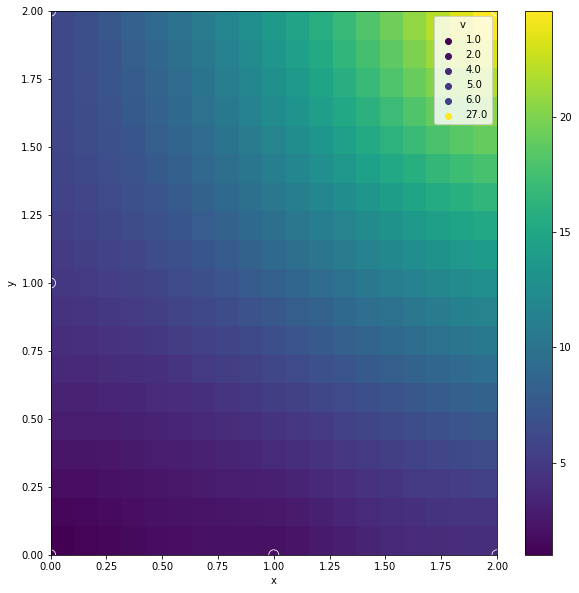

In [9]:
vn = wm.df()['v'].values.reshape((20,20),order='F')
fig, ax = plt.subplots(figsize=(10,10))
d = ax.pcolormesh(xx,yy,vn)
plt.colorbar(d)
cp.plot(ax=ax,hue='v', s=100, palette='viridis')

In [10]:
wm.df()

,x,y,z,crs,v,v_variance,geometry
0,0.0,0.000000,None,None,1.000000,0.000000e+00,POINT (0.00000 0.00000)
0,0.0,0.105263,None,None,1.441686,3.719840e-01,POINT (0.00000 0.10526)
0,0.0,0.210526,None,None,1.886225,6.504408e-01,POINT (0.00000 0.21053)
0,0.0,0.315789,None,None,2.331614,8.406637e-01,POINT (0.00000 0.31579)
0,0.0,0.421053,None,None,2.774926,9.459013e-01,POINT (0.00000 0.42105)
...,...,...,...,...,...,...,...
0,2.0,1.578947,None,None,20.812411,1.245866e+00,POINT (2.00000 1.57895)
0,2.0,1.684211,None,None,22.269877,1.010257e+00,POINT (2.00000 1.68421)
0,2.0,1.789474,None,None,23.784459,7.266798e-01,POINT (2.00000 1.78947)
0,2.0,1.894737,None,None,25.359879,3.913852e-01,POINT (2.00000 1.89474)
